In [79]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [80]:


# Step 1: Load Dataset
ticker = 'AAPL'
df = yf.download(ticker, start='2010-01-01', end='2024-12-31')
# df = df[['Close']]


[*********************100%***********************]  1 of 1 completed


In [81]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04,6.447412,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.355826,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.344076,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.386256,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2024-12-23,255.270004,255.270004,255.649994,253.449997,254.770004,40858800
2024-12-24,258.200012,258.200012,258.209991,255.289993,255.490005,23234700


In [65]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [82]:


# Assuming `df` is already loaded with the dataset
# Rename the columns for simplicity
df.columns = ['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Step 1: Preprocess Data
# Select features and target
features = [ 'High', 'Low', 'Open', 'Volume']  # Add features as needed
target = 'Close'

In [84]:
# Ensure 'Close' is the target variable
target = 'Close'

# Features exclude 'Close'
features = ['High', 'Low', 'Open', 'Volume']

# Initialize X and y as lists
X = []
y = []

# Scale only features
scaled_features = scaler.fit_transform(df[features])  # Scale only features
scaled_data = np.hstack((scaled_features, df[[target]].values))  # Append target as the last column


## **Sequence length 60**

In [ ]:

# Generate sequences
sequence_length = 60  # Assuming you have defined sequence_length somewhere
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_features[i-sequence_length:i])  # Use only scaled features
    y.append(scaled_data[i, -1])  # Target is the last column ('Close' price)

X, y = np.array(X), np.array(y) # Convert to NumPy arrays after appending

In [85]:
# Fix: Adjust the train_size calculation to match the length of y
train_size = int(0.8 * len(y))  # Use len(y) instead of len(X)

# Split into training and testing sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## **LSTM Model**

In [91]:
# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(25, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [87]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 60, 50)              │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 25)                  │           7,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,276 (75.30 KB)

 Trainable params: 19,276 (75.30 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 3300.7566 - val_loss: 24500.3789
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 1721.2687 - val_loss: 19324.7188
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 1481.8188 - val_loss: 18934.3984
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 1503.8971 - val_loss: 18830.7285
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 1513.3771 - val_loss: 19324.0098
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 1290.5425 - val_loss: 13994.4912
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 749.5555 - val_loss: 15417.4551
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 176.7774 - val_loss: 12428.4512
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 99.7773 - val_loss: 8203.0596
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 88.3631 - val_loss: 5967.1211
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 75.3746 - val_loss: 247

In [93]:


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Mean Squared Error (MSE): 322.82233243002446
Mean Absolute Error (MAE): 11.908262917684192
Root Mean Squared Error (RMSE): 17.967257231698568
R-squared (R²): 0.6206494594267693


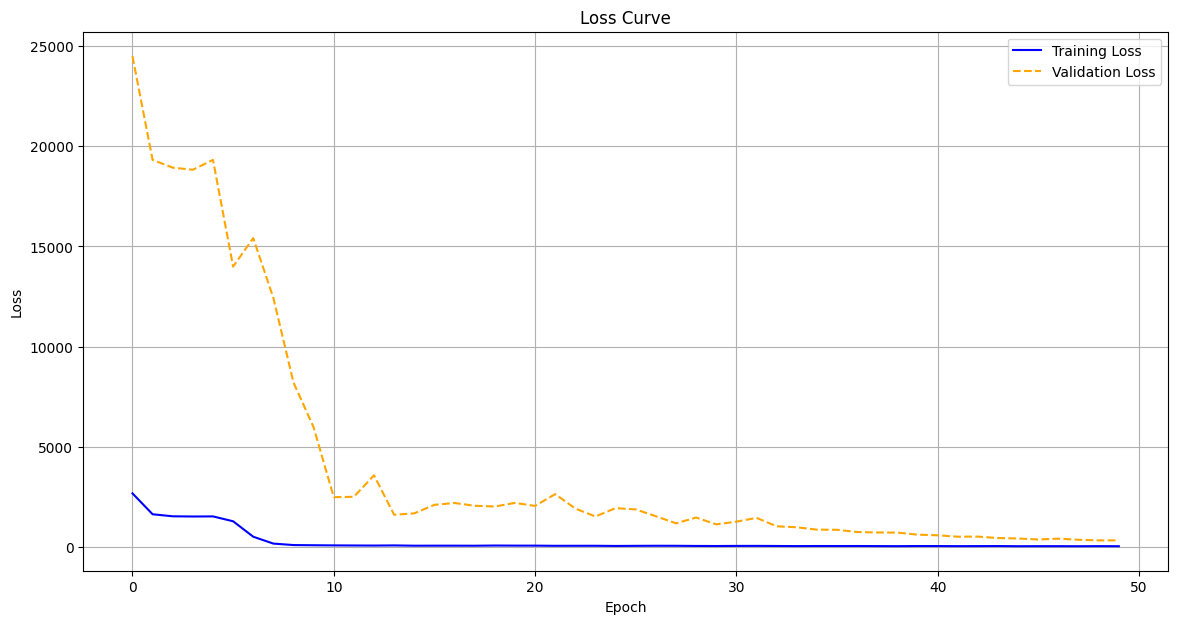

In [95]:





# Plot Training Loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [104]:
# Reconstruct the Full Dataset for Inverse Transformation
num_features = len(features)  # Number of features in the original dataset
dummy_data = np.zeros((y_pred.shape[0], num_features))  # Create dummy data for features
dummy_data[:, 0] = y_pred.flatten()  # Place predictions in the first column (or the correct index for 'Close')

# Inverse Transform to Get Actual Predicted Values
y_pred_actual = scaler.inverse_transform(dummy_data)[:, 0]  # Extract only the 'Close' column


In [ ]:
# Reconstruct the full dataset for inverse transformation of actual values
dummy_data_actual = np.zeros((y_test.shape[0], num_features))  # Create dummy data for features
dummy_data_actual[:, 0] = y_test.flatten()  # Place actual test target values in the first column

# Inverse transform to get the original actual prices
y_test_actual = scaler.inverse_transform(dummy_data_actual)[:, 0]  # Extract only the 'Close' column

# Reconstruct the predicted values (already done earlier)
dummy_data_predicted = np.zeros((y_pred.shape[0], num_features))  # Create dummy data for features
dummy_data_predicted[:, 0] = y_pred.flatten()  # Place predictions in the first column

# Inverse transform to get the original predicted prices
y_pred_actual = scaler.inverse_transform(dummy_data_predicted)[:, 0]  # Extract only the 'Close' column

# Extract test dates
test_dates = df.index[-len(y_test_actual):]

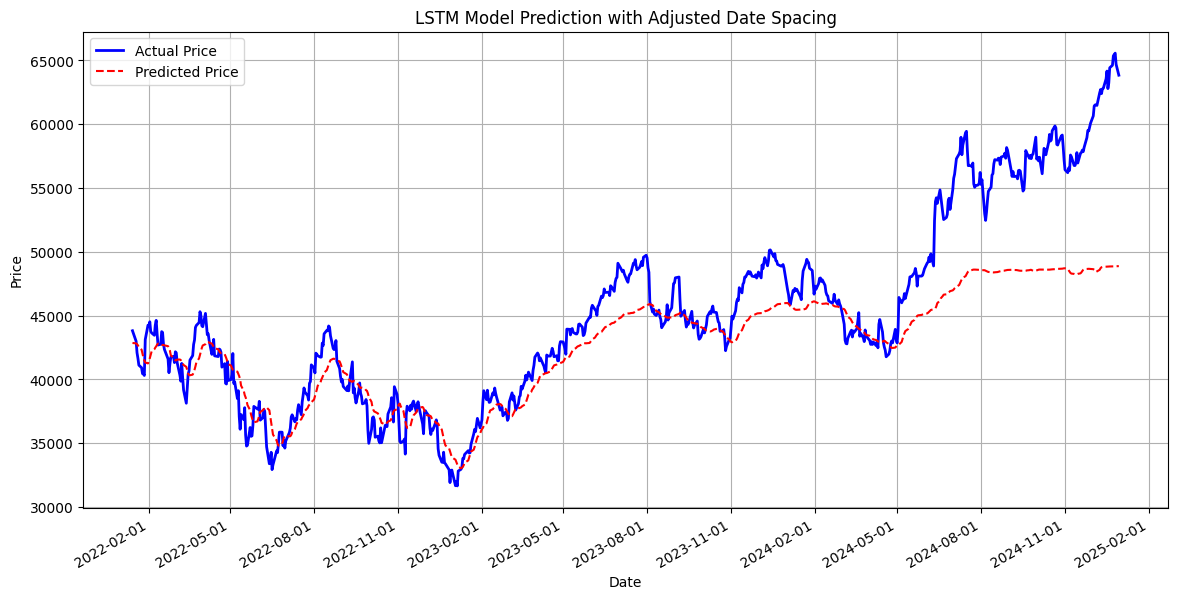

In [108]:
import matplotlib.dates as mdates

# Plot Results with Correctly Spaced Dates
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_actual, label='Actual Price', color='blue', linewidth=2)
plt.plot(test_dates, y_pred_actual, label='Predicted Price', color='red', linestyle='--')
plt.title('LSTM Model Prediction with Adjusted Date Spacing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Format the x-axis to display dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set desired date format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick interval to every 2 months
plt.gcf().autofmt_xdate()  # Auto-format dates for better readability

plt.show()

## **Fine Tune Model LSTM Model**

In [113]:
# Build LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  # Use dynamic input shape
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32),
    Dense(16),
    Dense(16),
    Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [114]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 60, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120,401 (470.32 KB)

 Trainable params: 120,401 (470.32 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - loss: 2350.3782 - val_loss: 19454.0605
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - loss: 1505.5610 - val_loss: 19399.7383
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - loss: 1478.7479 - val_loss: 18607.1973
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - loss: 1548.0168 - val_loss: 10493.1270
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 138ms/step - loss: 285.6983 - val_loss: 1959.3683
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - loss: 64.3521 - val_loss: 1232.2499
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - loss: 58.3375 - val_loss: 788.1646
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - loss: 51.0952 - val_loss: 697.3668
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - loss: 56.3154 - val_loss: 801.4855
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - loss: 47.1796 - val_loss: 743.2596
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - loss: 40.6077 - val_loss

In [116]:


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
Mean Squared Error (MSE): 81.67339604464132
Mean Absolute Error (MAE): 7.588441430319046
Root Mean Squared Error (RMSE): 9.037333458749949
R-squared (R²): 0.9040250818251487


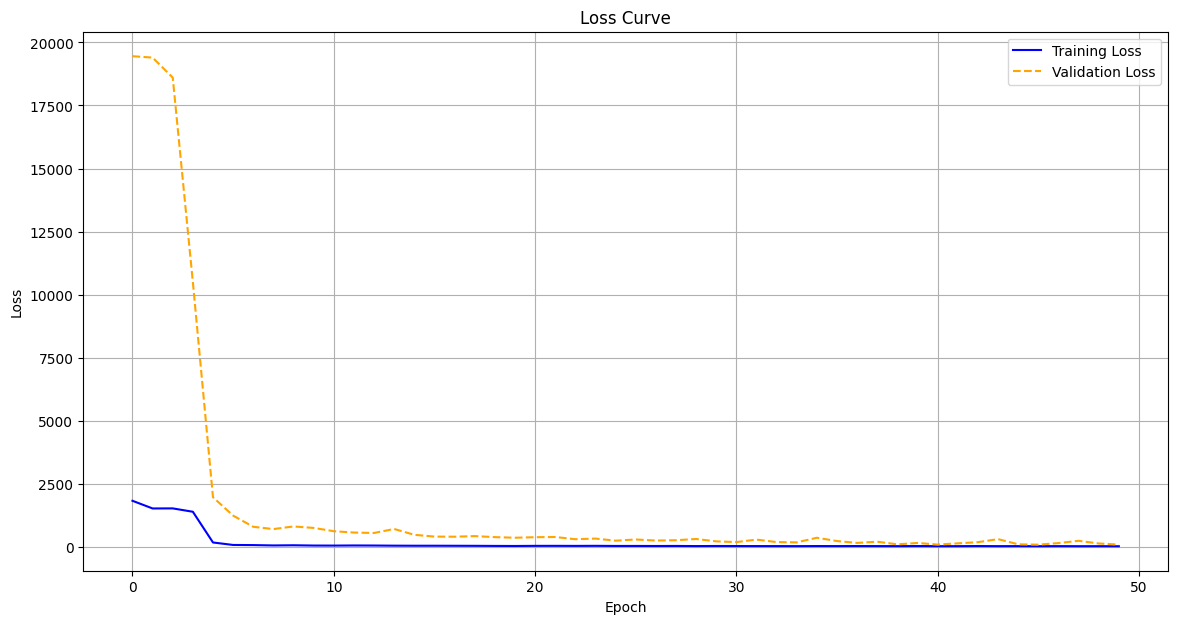

In [117]:





# Plot Training Loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [118]:
# Reconstruct the Full Dataset for Inverse Transformation
num_features = len(features)  # Number of features in the original dataset
dummy_data = np.zeros((y_pred.shape[0], num_features))  # Create dummy data for features
dummy_data[:, 0] = y_pred.flatten()  # Place predictions in the first column (or the correct index for 'Close')

# Inverse Transform to Get Actual Predicted Values
y_pred_actual = scaler.inverse_transform(dummy_data)[:, 0]  # Extract only the 'Close' column


In [119]:
# Reconstruct the full dataset for inverse transformation of actual values
dummy_data_actual = np.zeros((y_test.shape[0], num_features))  # Create dummy data for features
dummy_data_actual[:, 0] = y_test.flatten()  # Place actual test target values in the first column

# Inverse transform to get the original actual prices
y_test_actual = scaler.inverse_transform(dummy_data_actual)[:, 0]  # Extract only the 'Close' column

# Reconstruct the predicted values (already done earlier)
dummy_data_predicted = np.zeros((y_pred.shape[0], num_features))  # Create dummy data for features
dummy_data_predicted[:, 0] = y_pred.flatten()  # Place predictions in the first column

# Inverse transform to get the original predicted prices
y_pred_actual = scaler.inverse_transform(dummy_data_predicted)[:, 0]  # Extract only the 'Close' column

# Extract test dates
test_dates = df.index[-len(y_test_actual):]

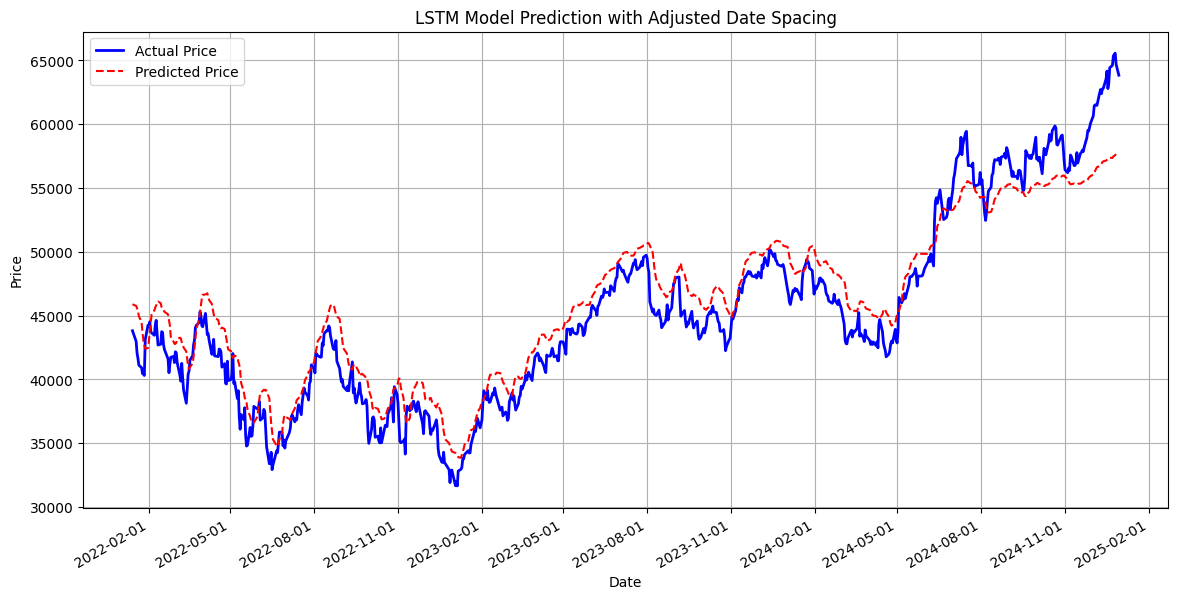

In [120]:
import matplotlib.dates as mdates

# Plot Results with Correctly Spaced Dates
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_actual, label='Actual Price', color='blue', linewidth=2)
plt.plot(test_dates, y_pred_actual, label='Predicted Price', color='red', linestyle='--')
plt.title('LSTM Model Prediction with Adjusted Date Spacing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Format the x-axis to display dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set desired date format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick interval to every 2 months
plt.gcf().autofmt_xdate()  # Auto-format dates for better readability

plt.show()

## **Fine Tune Model LSTM Model**

In [121]:
# Build LSTM Model
model = Sequential([
    LSTM(254, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  # Use dynamic input shape
    Dropout(0.2),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64),
    Dense(32),
    Dense(16),
    Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [122]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 60, 254)             │         263,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 60, 254)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 128)                 │         196,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 470,121 (1.79 MB)

 Trainable params: 470,121 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [123]:

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 372ms/step - loss: 1853.2587 - val_loss: 19058.8223
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 33s 355ms/step - loss: 1589.8569 - val_loss: 17653.7461
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 357ms/step - loss: 987.4753 - val_loss: 985.8171
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 40s 343ms/step - loss: 109.3262 - val_loss: 918.4438
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 31s 337ms/step - loss: 51.0989 - val_loss: 632.0707
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 343ms/step - loss: 54.9198 - val_loss: 917.9929
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 33s 353ms/step - loss: 46.1238 - val_loss: 641.9048
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 353ms/step - loss: 166.4884 - val_loss: 559.7885
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 358ms/step - loss: 501.7960 - val_loss: 448.8716
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 40s 350ms/step - loss: 523.6136 - val_loss: 206.4858
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 348ms/step - loss: 475.2692 - val_loss: 70.

In [124]:


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
Mean Squared Error (MSE): 151.2259677465184
Mean Absolute Error (MAE): 8.26328526082302
Root Mean Squared Error (RMSE): 12.297396787390346
R-squared (R²): 0.8222934200942036


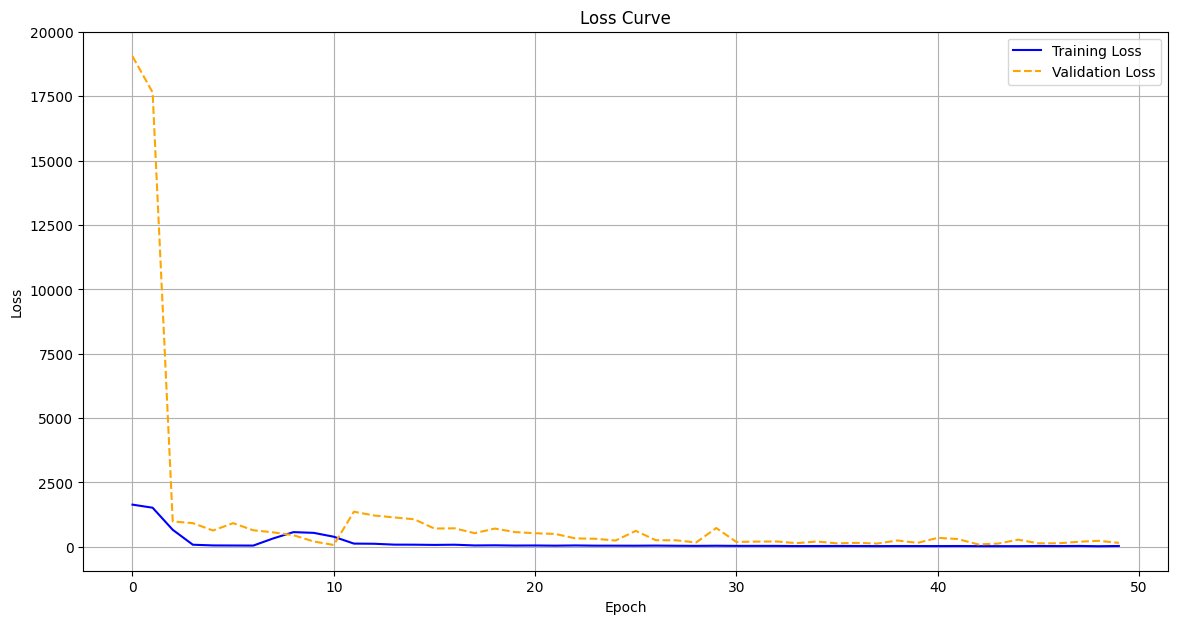

In [126]:





# Plot Training Loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [127]:
# Reconstruct the Full Dataset for Inverse Transformation
num_features = len(features)  # Number of features in the original dataset
dummy_data = np.zeros((y_pred.shape[0], num_features))  # Create dummy data for features
dummy_data[:, 0] = y_pred.flatten()  # Place predictions in the first column (or the correct index for 'Close')

# Inverse Transform to Get Actual Predicted Values
y_pred_actual = scaler.inverse_transform(dummy_data)[:, 0]  # Extract only the 'Close' column


In [128]:
# Reconstruct the full dataset for inverse transformation of actual values
dummy_data_actual = np.zeros((y_test.shape[0], num_features))  # Create dummy data for features
dummy_data_actual[:, 0] = y_test.flatten()  # Place actual test target values in the first column

# Inverse transform to get the original actual prices
y_test_actual = scaler.inverse_transform(dummy_data_actual)[:, 0]  # Extract only the 'Close' column

# Reconstruct the predicted values (already done earlier)
dummy_data_predicted = np.zeros((y_pred.shape[0], num_features))  # Create dummy data for features
dummy_data_predicted[:, 0] = y_pred.flatten()  # Place predictions in the first column

# Inverse transform to get the original predicted prices
y_pred_actual = scaler.inverse_transform(dummy_data_predicted)[:, 0]  # Extract only the 'Close' column

# Extract test dates
test_dates = df.index[-len(y_test_actual):]

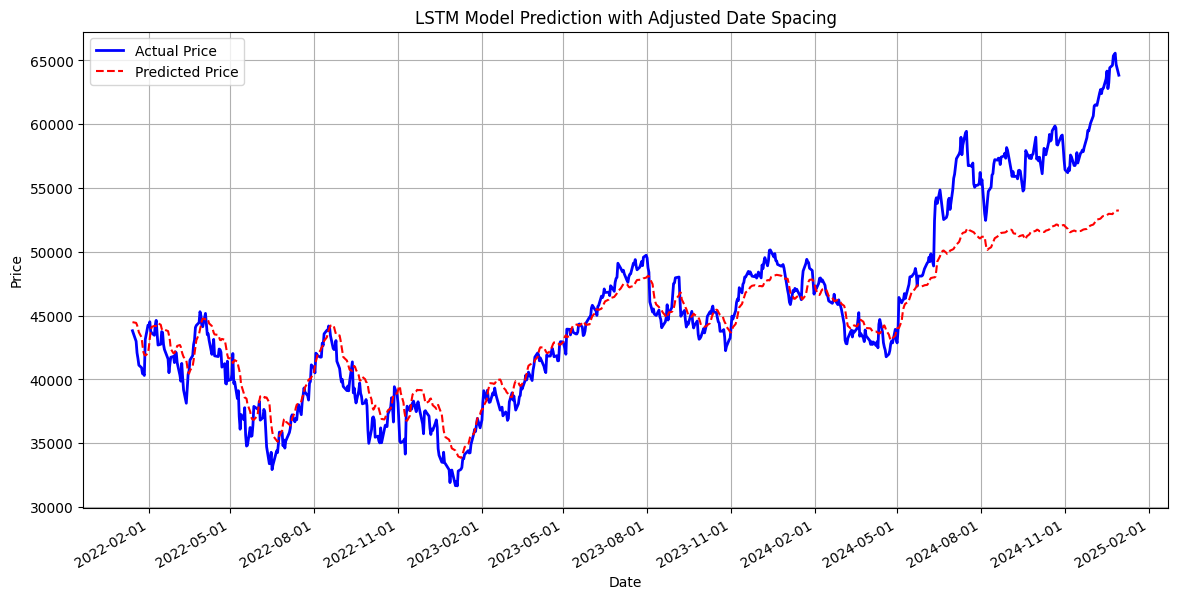

In [129]:
import matplotlib.dates as mdates

# Plot Results with Correctly Spaced Dates
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_actual, label='Actual Price', color='blue', linewidth=2)
plt.plot(test_dates, y_pred_actual, label='Predicted Price', color='red', linestyle='--')
plt.title('LSTM Model Prediction with Adjusted Date Spacing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Format the x-axis to display dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set desired date format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick interval to every 2 months
plt.gcf().autofmt_xdate()  # Auto-format dates for better readability

plt.show()

## **LSTM model with 90 day window**

In [131]:

# Initialize X and y as lists
X = []
y = []

# Scale only features
scaled_features = scaler.fit_transform(df[features])  # Scale only features
scaled_data = np.hstack((scaled_features, df[[target]].values))  # Append target as the last column


In [132]:

# Generate sequences
sequence_length = 90  # Assuming you have defined sequence_length somewhere
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_features[i-sequence_length:i])  # Use only scaled features
    y.append(scaled_data[i, -1])  # Target is the last column ('Close' price)

X, y = np.array(X), np.array(y) # Convert to NumPy arrays after appending

In [133]:
# Fix: Adjust the train_size calculation to match the length of y
train_size = int(0.8 * len(y))  # Use len(y) instead of len(X)

# Split into training and testing sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### **Fine Tune LSTM Model**

In [134]:
# Build LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  # Use dynamic input shape
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32),
    Dense(16),
    Dense(16),
    Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [135]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                       │ (None, 90, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 90, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120,401 (470.32 KB)

 Trainable params: 120,401 (470.32 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 23s 194ms/step - loss: 2395.7861 - val_loss: 18933.8457
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - loss: 1482.1104 - val_loss: 17432.4941
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - loss: 1621.1113 - val_loss: 18604.4453
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 22s 205ms/step - loss: 1494.5043 - val_loss: 11280.1221
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - loss: 335.0161 - val_loss: 1507.8651
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - loss: 59.1717 - val_loss: 1586.1442
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 18s 195ms/step - loss: 102.2386 - val_loss: 663.4577
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - loss: 53.9282 - val_loss: 565.4629
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - loss: 57.1812 - val_loss: 516.9725
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - loss: 42.6238 - val_loss: 523.9539
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - loss: 35.4397 - val_los

In [137]:


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step
Mean Squared Error (MSE): 37.05990095740414
Mean Absolute Error (MAE): 5.042164599394054
Root Mean Squared Error (RMSE): 6.087684367426102
R-squared (R²): 0.9567369152909403


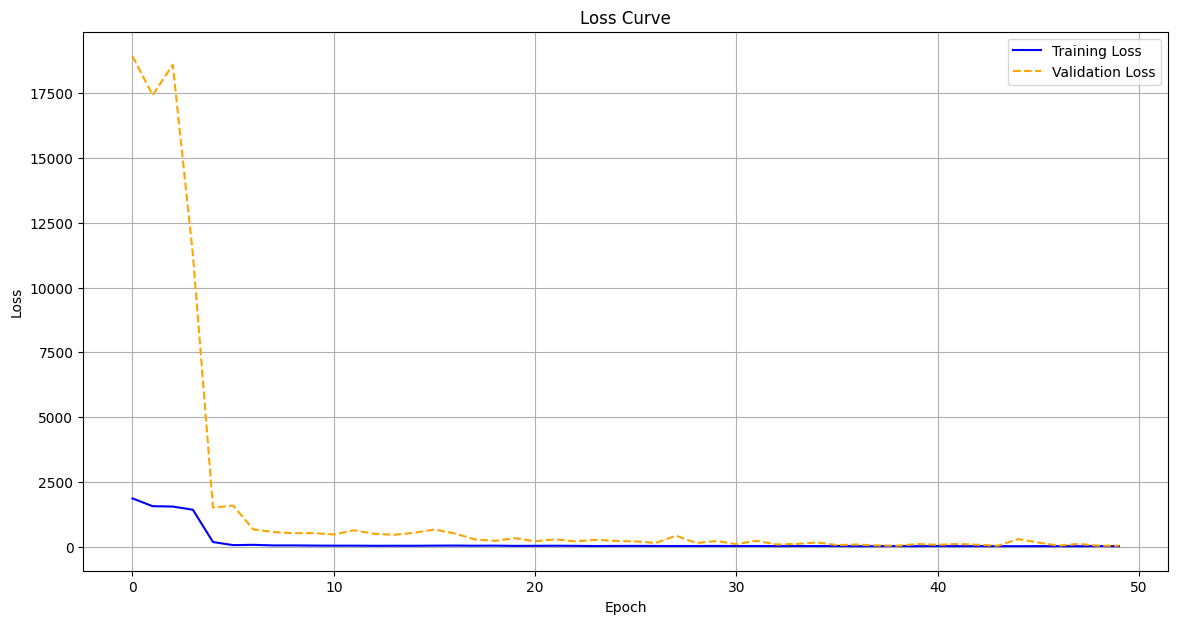

In [138]:





# Plot Training Loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [139]:
# Reconstruct the Full Dataset for Inverse Transformation
num_features = len(features)  # Number of features in the original dataset
dummy_data = np.zeros((y_pred.shape[0], num_features))  # Create dummy data for features
dummy_data[:, 0] = y_pred.flatten()  # Place predictions in the first column (or the correct index for 'Close')

# Inverse Transform to Get Actual Predicted Values
y_pred_actual = scaler.inverse_transform(dummy_data)[:, 0]  # Extract only the 'Close' column


In [140]:
# Reconstruct the full dataset for inverse transformation of actual values
dummy_data_actual = np.zeros((y_test.shape[0], num_features))  # Create dummy data for features
dummy_data_actual[:, 0] = y_test.flatten()  # Place actual test target values in the first column

# Inverse transform to get the original actual prices
y_test_actual = scaler.inverse_transform(dummy_data_actual)[:, 0]  # Extract only the 'Close' column

# Reconstruct the predicted values (already done earlier)
dummy_data_predicted = np.zeros((y_pred.shape[0], num_features))  # Create dummy data for features
dummy_data_predicted[:, 0] = y_pred.flatten()  # Place predictions in the first column

# Inverse transform to get the original predicted prices
y_pred_actual = scaler.inverse_transform(dummy_data_predicted)[:, 0]  # Extract only the 'Close' column

# Extract test dates
test_dates = df.index[-len(y_test_actual):]

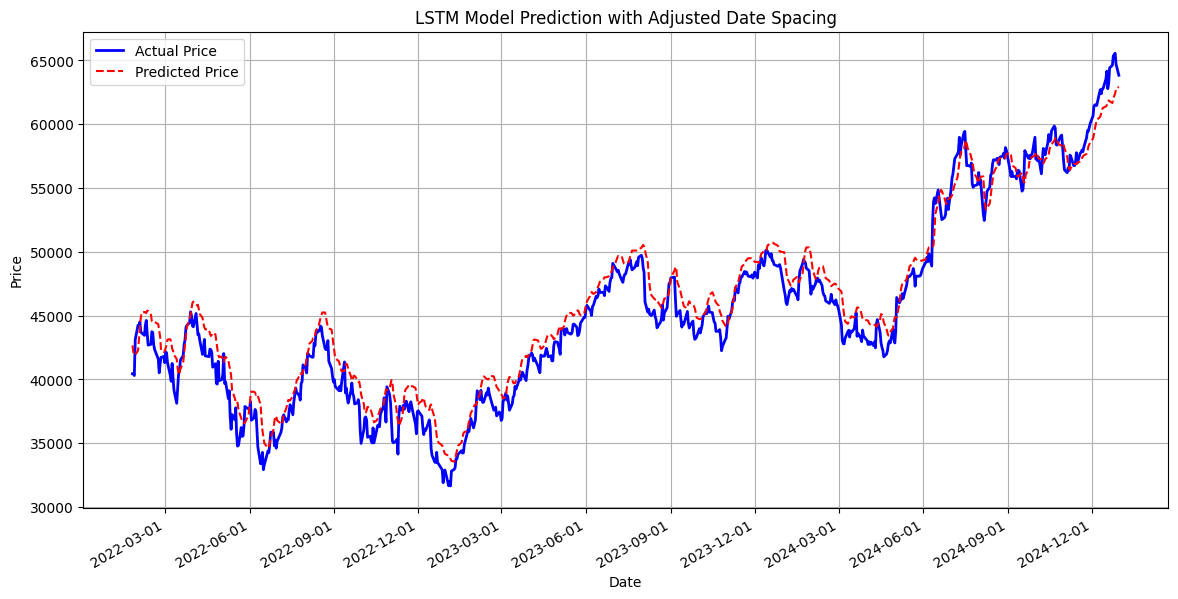

In [141]:
import matplotlib.dates as mdates

# Plot Results with Correctly Spaced Dates
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_actual, label='Actual Price', color='blue', linewidth=2)
plt.plot(test_dates, y_pred_actual, label='Predicted Price', color='red', linestyle='--')
plt.title('LSTM Model Prediction with Adjusted Date Spacing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Format the x-axis to display dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set desired date format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick interval to every 2 months
plt.gcf().autofmt_xdate()  # Auto-format dates for better readability

plt.show()

# **Univariate**

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# # Step 1: Load Dataset
# ticker = 'AAPL'  # Replace with your desired ticker symbol
# df = yf.download(ticker, start='2010-01-01', end='2024-12-31')
df = df[['Close']]  # Use only the 'Close' price

# Step 2: Preprocess Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

sequence_length = 60  # Use last 60 days to predict the next day
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Sliding window of last 60 days
    y.append(scaled_data[i, 0])  # Predict the next day's closing price

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for LSTM input

# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


##  **LSTM MODEL**

In [142]:

# Step 3: Build LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32),
    Dense(16),
    Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [143]:

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - loss: 0.0046 - val_loss: 0.0023
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 141ms/step - loss: 5.6779e-04 - val_loss: 0.0012
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - loss: 3.6961e-04 - val_loss: 6.7816e-04
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - loss: 3.5941e-04 - val_loss: 6.1294e-04
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - loss: 3.6063e-04 - val_loss: 6.3082e-04
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - loss: 3.0335e-04 - val_loss: 9.6334e-04
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - loss: 3.1883e-04 - val_loss: 7.6979e-04
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - loss: 3.1570e-04 - val_loss: 6.5649e-04
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - loss: 3.2287e-04 - val_loss: 0.0024
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - loss: 3.5161e-04 - val_loss: 4.5163e-04
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - loss: 3.0

In [146]:

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
y_pred_actual = scaler.inverse_transform(y_pred)  # Inverse transform predictions to original scale
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform test values to original scale

mse = mean_squared_error(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
Mean Squared Error (MSE): 21.581338620551534
Mean Absolute Error (MAE): 3.692863875090033
Root Mean Squared Error (RMSE): 4.645571936861115
R-squared (R²): 0.9746396340972638


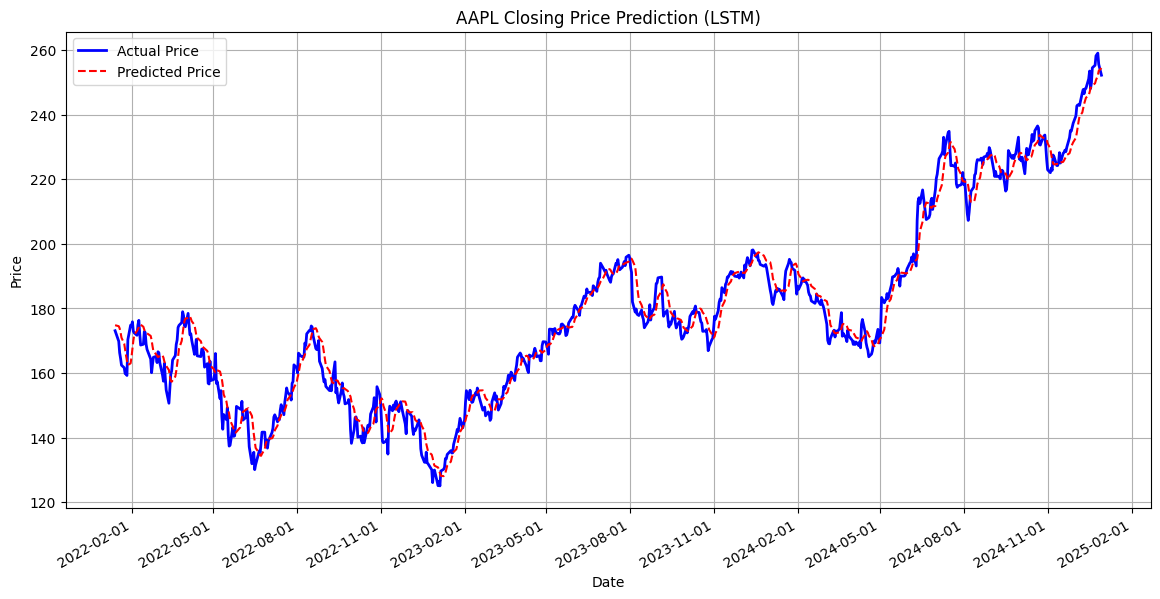

In [147]:

# Step 6: Plot Results
test_dates = df.index[-len(y_test_actual):]  # Extract corresponding dates for y_test_actual

plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_actual, label='Actual Price', color='blue', linewidth=2)
plt.plot(test_dates, y_pred_actual, label='Predicted Price', color='red', linestyle='--')
plt.title(f"{ticker} Closing Price Prediction (LSTM)")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Format the x-axis to display dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set date format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick interval to every 3 months
plt.gcf().autofmt_xdate()  # Auto-format dates for better readability

plt.show()

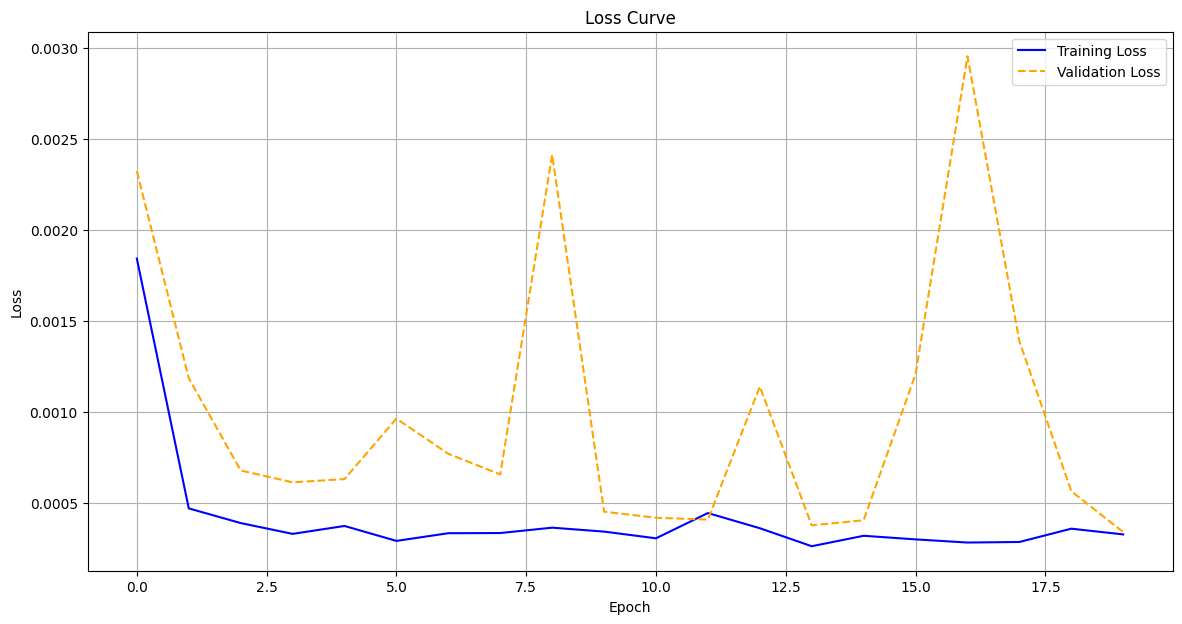

In [148]:


# Plot Training Loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


## **ARIMA**


ARIMA Performance Metrics:
Mean Squared Error (MSE): 852.80
Mean Absolute Error (MAE): 23.31
Root Mean Squared Error (RMSE): 29.20
R-squared (R²): -0.00


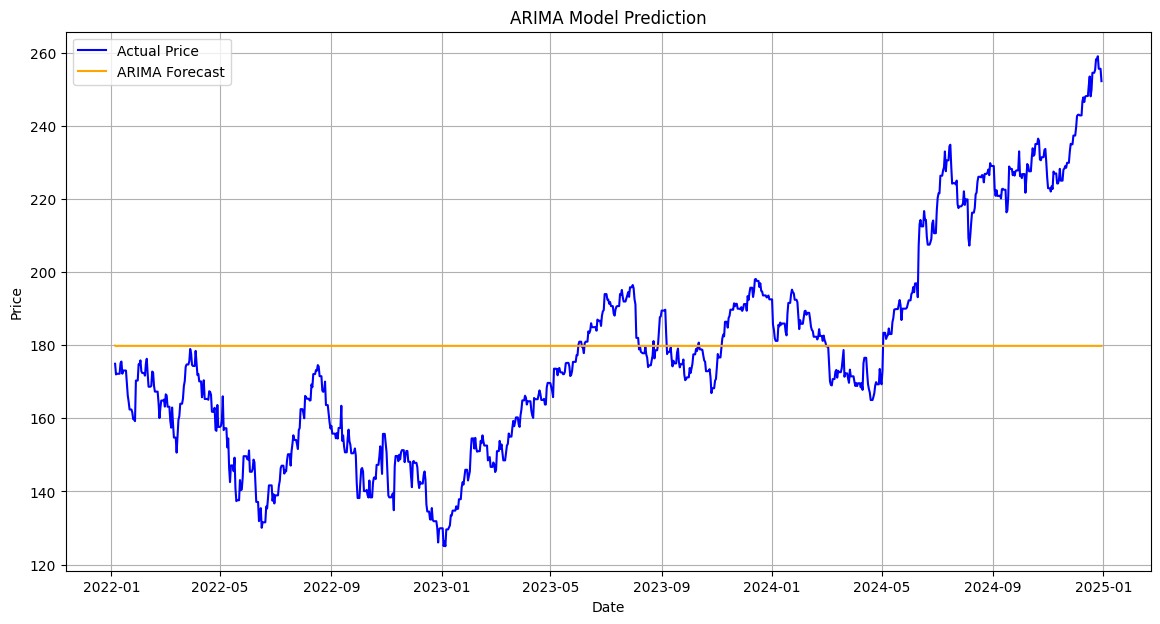

In [149]:
from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import matplotlib.pyplot as plt
# import numpy as np

# # Step 1: Extract the 'Close' column for ARIMA
# data = df['Close']  # Use the already downloaded dataset from LSTM
# data = data.dropna()  # Ensure no missing values

# Step 2: Train-Test Split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Step 3: Fit ARIMA Model
arima_order = (5, 1, 0)  # Adjust the order based on ACF/PACF plots if needed
arima_model = ARIMA(train, order=arima_order)
arima_fit = arima_model.fit()

# Step 4: Forecast with ARIMA
arima_forecast = arima_fit.forecast(steps=len(test))

# Step 5: Evaluate Model Performance
mse = mean_squared_error(test, arima_forecast)
mae = mean_absolute_error(test, arima_forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test, arima_forecast)

print("ARIMA Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 6: Plot Results
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(test):], test, label="Actual Price", color="blue")
plt.plot(data.index[-len(test):], arima_forecast, label="ARIMA Forecast", color="orange")
plt.title(f"ARIMA Model Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


## **SARIMA**

SARIMA Performance Metrics:
Mean Squared Error (MSE): 3041.37
Mean Absolute Error (MAE): 52.08
Root Mean Squared Error (RMSE): 55.15
R-squared (R²): -2.58


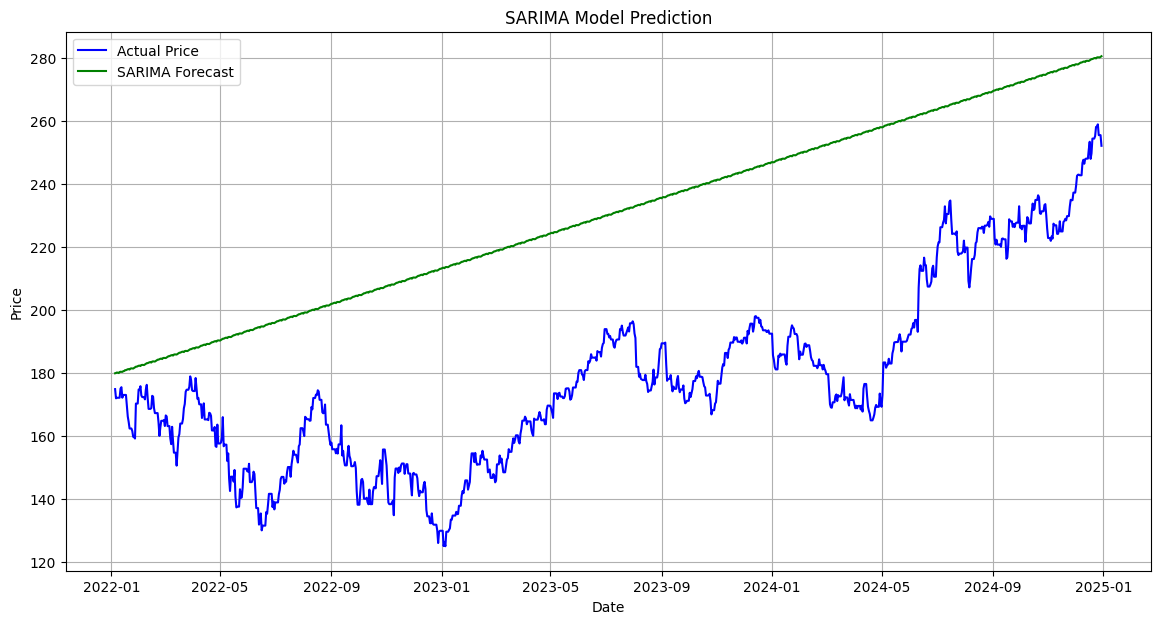

In [150]:
# Step 3: Fit SARIMA Model
sarima_order = (1, 1, 1)  # Example non-seasonal order
sarima_seasonal_order = (1, 1, 1, 12)  # Example seasonal order (seasonality = 12 months)
sarima_model = SARIMAX(train, order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Step 4: Forecast with SARIMA
sarima_forecast = sarima_fit.forecast(steps=len(test))

# Step 5: Evaluate Model Performance
mse = mean_squared_error(test, sarima_forecast)
mae = mean_absolute_error(test, sarima_forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test, sarima_forecast)

print("SARIMA Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 6: Plot Results
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(test):], test, label="Actual Price", color="blue")
plt.plot(data.index[-len(test):], sarima_forecast, label="SARIMA Forecast", color="green")
plt.title(f"SARIMA Model Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from itertools import product

# Example parameter grid for SARIMA
p = d = q = range(0, 3)  # Non-seasonal parameters
P = D = Q = range(0, 2)  # Seasonal parameters
s = [12]  # Assuming yearly seasonality (monthly data)

parameters = list(product(p, d, q, P, D, Q, s))
best_aic = float('inf')
best_params = None

for param in parameters:
    try:
        model = SARIMAX(train, order=(param[0], param[1], param[2]),
                        seasonal_order=(param[3], param[4], param[5], param[6]))
        result = model.fit(disp=False)
        if result.aic < best_aic:
            best_aic = result.aic
            best_params = param
    except:
        continue

print(f"Best SARIMA parameters: {best_params} with AIC: {best_aic}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespa

[*********************100%***********************]  1 of 1 completed
<ipython-input-7-e7b8c5dfa5e4>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward-fill missing data


ARIMA Performance Metrics:
Mean Squared Error (MSE): 847.22
Mean Absolute Error (MAE): 22.86
Root Mean Squared Error (RMSE): 29.11
R-squared (R²): -0.00

SARIMA Performance Metrics:
Mean Squared Error (MSE): 2679.04
Mean Absolute Error (MAE): 48.50
Root Mean Squared Error (RMSE): 51.76
R-squared (R²): -2.16


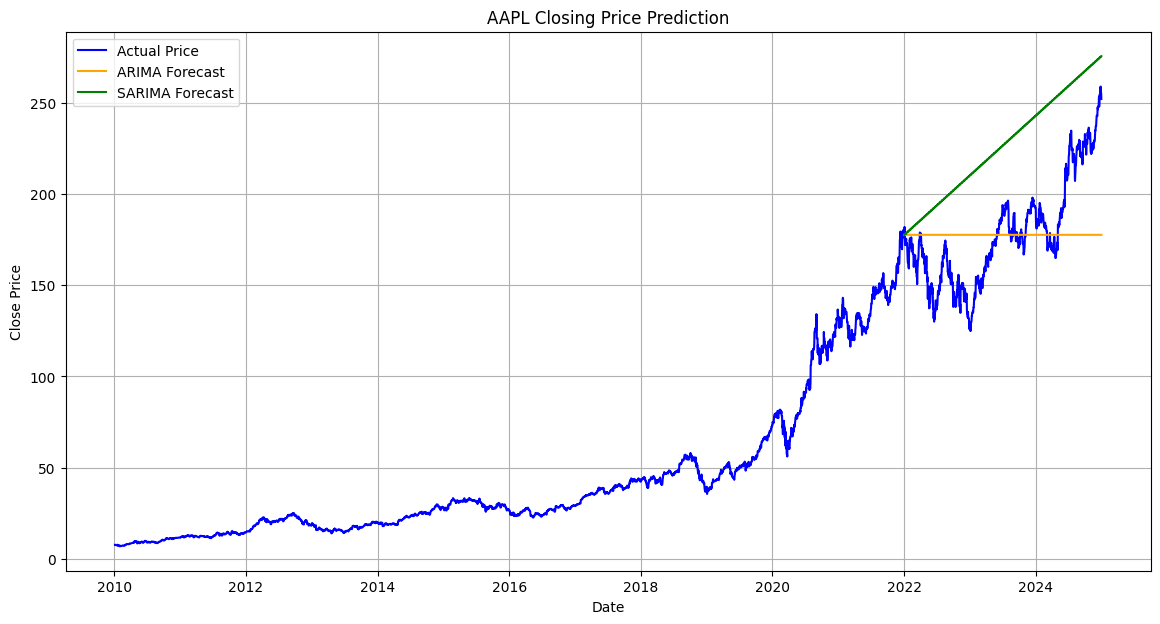

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Fetch Yahoo Finance Data
stock_symbol = "AAPL"  # Replace with your desired stock symbol
start_date = "2010-01-01"
end_date = "2024-12-31"

data = yf.download(stock_symbol, start=start_date, end=end_date)
data = data["Close"]  # Using 'Close' prices

data = data.dropna()  # Ensure no missing values

data.index = pd.to_datetime(data.index)
data = data.asfreq('D')  # Align to daily frequency
data = data.fillna(method='ffill')  # Forward-fill missing data

# Step 2: Train-Test Split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Step 3: Fit ARIMA Model
arima_order = (5, 1, 0)  # Example order, adjust based on ACF/PACF plots

arima_model = ARIMA(train, order=arima_order)
arima_fit = arima_model.fit()

# Step 4: ARIMA Forecast
arima_forecast = arima_fit.forecast(steps=len(test))

# Step 5: Fit SARIMA Model
sarima_order = (1, 1, 1)
sarima_seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

sarima_model = SARIMAX(train, order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_fit = sarima_model.fit()

# Step 6: SARIMA Forecast
sarima_forecast = sarima_fit.forecast(steps=len(test))

# Step 7: Evaluate and Visualize
# ARIMA Metrics
arima_mse = mean_squared_error(test, arima_forecast)
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(arima_mse)
arima_r2 = r2_score(test, arima_forecast)

# SARIMA Metrics
sarima_mse = mean_squared_error(test, sarima_forecast)
sarima_mae = mean_absolute_error(test, sarima_forecast)
sarima_rmse = np.sqrt(sarima_mse)
sarima_r2 = r2_score(test, sarima_forecast)

print("ARIMA Performance Metrics:")
print(f"Mean Squared Error (MSE): {arima_mse:.2f}")
print(f"Mean Absolute Error (MAE): {arima_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {arima_rmse:.2f}")
print(f"R-squared (R²): {arima_r2:.2f}")

print("\nSARIMA Performance Metrics:")
print(f"Mean Squared Error (MSE): {sarima_mse:.2f}")
print(f"Mean Absolute Error (MAE): {sarima_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {sarima_rmse:.2f}")
print(f"R-squared (R²): {sarima_r2:.2f}")

# Plot Results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data, label="Actual Price", color="blue")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast", color="orange")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast", color="green")
plt.title(f"{stock_symbol} Closing Price Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import yfinance as yf
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Load Dataset
ticker = 'AAPL'  # Replace with your desired ticker symbol
df = yf.download(ticker, start='2010-01-01', end='2024-12-31')
df = df[['Close']].reset_index()

# Prepare data for Prophet
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})  # Prophet requires 'ds' (date) and 'y' (target)

# Ensure 'y' column is numeric
df['y'] = pd.to_numeric(df['y'], errors='coerce') # Convert 'y' to numeric, handle errors by setting non-numeric to NaN
df = df.dropna() # Drop rows with NaN values

# Step 2: Split the Dataset
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

# Step 3: Train the Prophet Model with Custom 90-Day Seasonality
model = Prophet(daily_seasonality=False, yearly_seasonality=False)  # Disable default seasonality
model.add_seasonality(name='quarterly', period=90, fourier_order=8)  # Add 90-day seasonality
model.fit(train_df)

# Step 4: Forecast
future = model.make_future_dataframe(periods=len(test_df))  # Generate future dates for prediction
forecast = model.predict(future)

# Extract the predicted values for the test set
predicted = forecast[['ds', 'yhat']].iloc[-len(test_df):]
predicted = predicted.set_index('ds')
test_df = test_df.set_index('ds')

# Step 5: Evaluate Model Performance
mse = mean_squared_error(test_df['y'], predicted['yhat'])
mae = mean_absolute_error(test_df['y'], predicted['yhat'])
rmse = np.sqrt(mse)
r2 = r2_score(test_df['y'], predicted['yhat'])

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Step 6: Plot Results
plt.figure(figsize=(14, 7))
plt.plot(test_df['y'], label='Actual Price', color='blue')
plt.plot(predicted['yhat'], label='Predicted Price', color='red')
plt.title(f"{ticker} Closing Price Prediction with 90-Day Seasonality")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 7: Visualize Prophet Components
model.plot_components(forecast)
plt.show()

[*********************100%***********************]  1 of 1 completed


TypeError: arg must be a list, tuple, 1-d array, or Series

In [ ]:
pip install --upgrade xgboost


[*********************100%***********************]  1 of 1 completed


Mean Squared Error (MSE): 574.823722386289
Mean Absolute Error (MAE): 14.221469773046229
Root Mean Squared Error (RMSE): 23.975481692476773
R-squared (R²): 0.31381922118539507


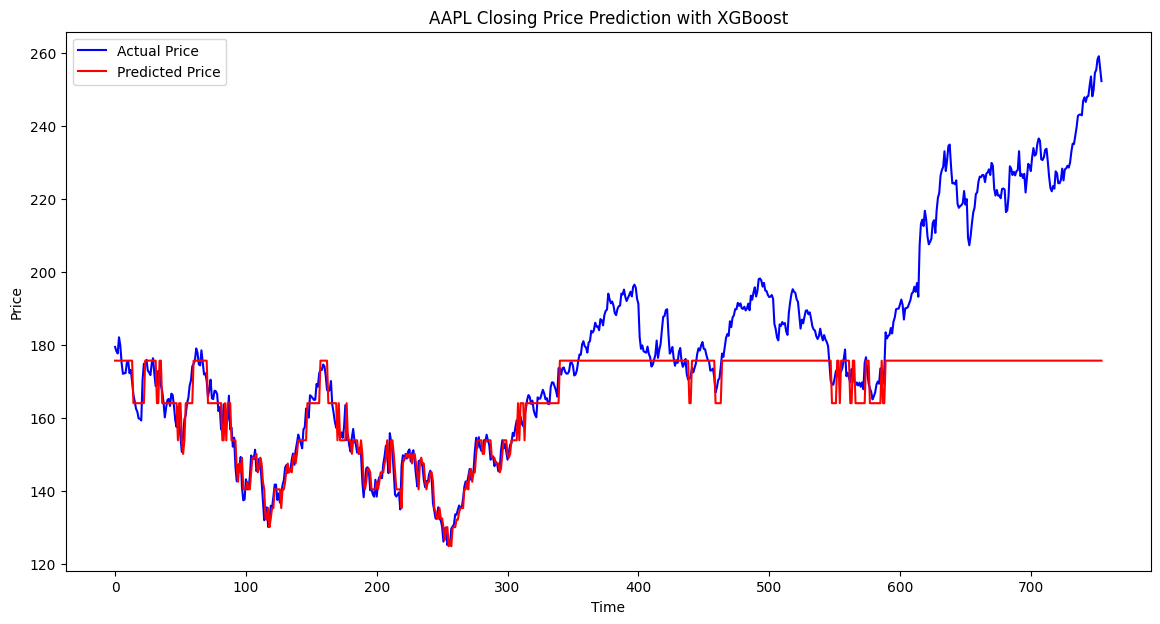

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Step 1: Load Dataset
ticker = 'AAPL'  # Replace with your desired ticker symbol
df = yf.download(ticker, start='2010-01-01', end='2024-12-31')
df = df[['Close']].reset_index()

# Prepare the data for supervised learning (shift target variable)
df['Target'] = df['Close'].shift(-1)  # Predict the next day's closing price
df = df.dropna()  # Drop the last row with NaN target

# Step 2: Train-Test Split
X = df[['Close']].values  # Use only the 'Close' price as input
y = df['Target'].values  # Target is the next day's 'Close' price

scaler = MinMaxScaler(feature_range=(0, 1))  # Scale the input features
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# Step 3: Train XGBoost Model
xgboost_model = xgb.XGBRegressor(
    n_estimators=1000,  # Number of trees
    learning_rate=0.01,  # Step size shrinkage
    max_depth=3,  # Maximum depth of the trees
    subsample=0.8,  # Subsample ratio
    colsample_bytree=0.8,  # Subsample ratio of columns for each tree
    random_state=42
)

# Convert y_train and y_test to NumPy arrays for compatibility
y_train = np.array(y_train)
y_test = np.array(y_test)

# Train the model with early stopping
xgboost_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],

    verbose=False
)

# Step 4: Make Predictions
y_pred = xgboost_model.predict(X_test)

# Step 5: Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Step 6: Plot Results
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title(f"{ticker} Closing Price Prediction with XGBoost")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Step 1: Load Dataset
ticker = 'AAPL'  # Replace with your desired ticker symbol
df = yf.download(ticker, start='2010-01-01', end='2024-12-31')

# Use all features (Open, High, Low, Close, Volume)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].reset_index()

# Prepare the data for supervised learning (shift target variable)
df['Target'] = df['Close'].shift(-1)  # Predict the next day's closing price
df = df.dropna()  # Drop the last row with NaN target

# Step 2: Train-Test Split
X = df[['Open', 'High', 'Low', 'Close', 'Volume']].values  # Use all features as input
y = df['Target'].values  # Target is the next day's 'Close' price

scaler = MinMaxScaler(feature_range=(0, 1))  # Scale the input features
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# Step 3: Train XGBoost Model (Manual Hyperparameter Selection)
xgboost_model = xgb.XGBRegressor(
    n_estimators=1000,  # Number of trees
    learning_rate=0.05,  # Learning rate
    max_depth=5,  # Maximum depth of trees
    subsample=0.8,  # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used for training each tree
    gamma=1,  # Minimum loss reduction to make a split
    random_state=42
)

xgboost_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],

    verbose=True
)

# Step 4: Make Predictions and Evaluate
y_pred = xgboost_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Fine-Tuned Model Results:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


[*********************100%***********************]  1 of 1 completed

[0]	validation_0-rmse:133.37716
[1]	validation_0-rmse:128.36644
[2]	validation_0-rmse:123.66062
[3]	validation_0-rmse:119.18640
[4]	validation_0-rmse:114.91563
[5]	validation_0-rmse:110.86292
[6]	validation_0-rmse:106.48756
[7]	validation_0-rmse:102.33719
[8]	validation_0-rmse:98.82112
[9]	validation_0-rmse:95.24358
[10]	validation_0-rmse:91.71958
[11]	validation_0-rmse:88.46393
[12]	validation_0-rmse:85.57420
[13]	validation_0-rmse:82.60192
[14]	validation_0-rmse:79.64026
[15]	validation_0-rmse:76.85034
[16]	validation_0-rmse:74.54338
[17]	validation_0-rmse:72.01618
[18]	validation_0-rmse:69.99010
[19]	validation_0-rmse:67.67615
[20]	validation_0-rmse:65.48964
[21]	validation_0-rmse:63.35287
[22]	validation_0-rmse:61.61507
[23]	validation_0-rmse:59.79213
[24]	validation_0-rmse:58.24321
[25]	validation_0-rmse:56.45900
[26]	validation_0-rmse:54.93036
[27]	validation_0-rmse:53.41032


[28]	validation_0-rmse:51.88713
[29]	validation_0-rmse:50.52056
[30]	validation_0-rmse:49.12372
[31]	validation_0-rmse:47.97376
[32]	validation_0-rmse:46.70765
[33]	validation_0-rmse:45.64192
[34]	validation_0-rmse:44.66700
[35]	validation_0-rmse:43.59920
[36]	validation_0-rmse:42.56490
[37]	validation_0-rmse:41.58817
[38]	validation_0-rmse:40.67948
[39]	validation_0-rmse:39.89678
[40]	validation_0-rmse:39.06083
[41]	validation_0-rmse:38.31519
[42]	validation_0-rmse:37.54525
[43]	validation_0-rmse:36.92241
[44]	validation_0-rmse:36.24958
[45]	validation_0-rmse:35.63192
[46]	validation_0-rmse:35.03789
[47]	validation_0-rmse:34.48444
[48]	validation_0-rmse:33.98119
[49]	validation_0-rmse:33.50863
[50]	validation_0-rmse:32.99534
[51]	validation_0-rmse:32.53769
[52]	validation_0-rmse:32.14414
[53]	validation_0-rmse:31.70707
[54]	validation_0-rmse:31.29410
[55]	validation_0-rmse:30.88290
[56]	validation_0-rmse:30.52620
[57]	validation_0-rmse:30.17648
[58]	validation_0-rmse:29.88371
[59]	val

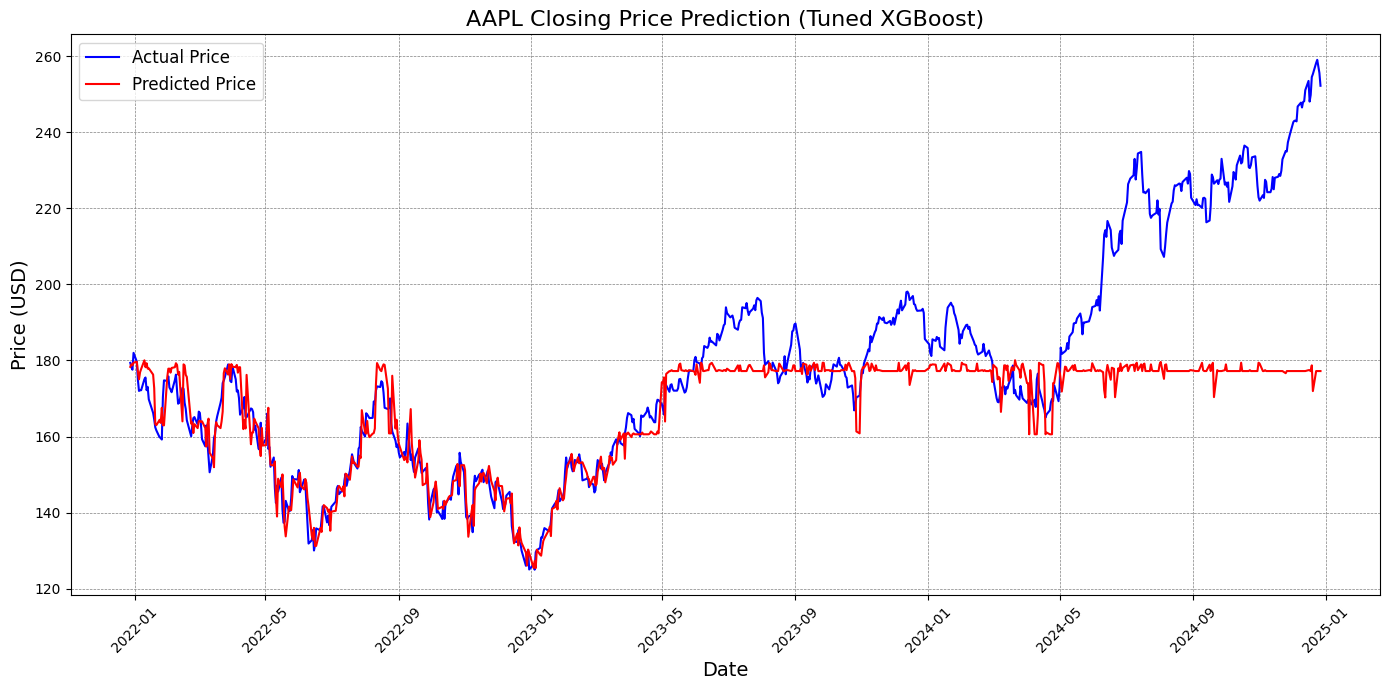

In [ ]:
# Ensure test set dates are correctly extracted
test_dates = df['Date'].iloc[-len(y_test):]  # Extract corresponding dates for y_test

# Updated Time Series Chart with Correct Dates on X-Axis
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test, label='Actual Price', color='blue' )
plt.plot(test_dates, y_pred, label='Predicted Price', color='red')
plt.title(f"{ticker} Closing Price Prediction (Tuned XGBoost)", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# **Feature Engineering**

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


# Step 1: Load Dataset (Reload the dataset)
ticker = 'AAPL'  # Replace with your desired ticker symbol
df = yf.download(ticker, start='2010-01-01', end='2024-12-31')
df = df[['Close', 'Volume']].reset_index()  # Include 'Volume' for OBV calculation


# Step 2: Feature Engineering
# Ensure SMA_10 is calculated as a Series, not a DataFrame
df['SMA_10'] = df['Close'].rolling(window=10).mean()  # 10-day Simple Moving Average
df['SMA_50'] = df['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average # Calculate SMA_50

# Calculate EMA_10
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()  # 10-day Exponential Moving Average # Calculate EMA_10

# Calculate MACD
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']  # Calculate MACD

# Calculate Bollinger Bands
df['SMA_20'] = df['Close'].rolling(window=20).mean()  # 20-day SMA for Bollinger Bands
df['StdDev_20'] = df['Close'].rolling(window=20).std()  # 20-day Standard Deviation
df['Upper_Band'] = df['SMA_20'] + 2 * df['StdDev_20']  # Upper Bollinger Band
df['Lower_Band'] = df['SMA_20'] - 2 * df['StdDev_20']  # Lower Bollinger Band

# Ensure RSI is calculated correctly
gain = df['Close'].diff(1).clip(lower=0).rolling(window=14).mean()
loss = df['Close'].diff(1).clip(upper=0).abs().rolling(window=14).mean()
df['RSI'] = 100 - (100 / (1 + (gain / loss)))  # Relative Strength Index

# Ensure OBV is calculated as a Series
df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()  # On-Balance Volume
# Drop NaN values caused by feature calculation
df = df.dropna()





[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 148ms/step - loss: 0.0117 - val_loss: 0.0015
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - loss: 7.9609e-04 - val_loss: 0.0011
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - loss: 5.5513e-04 - val_loss: 7.9563e-04
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - loss: 5.5229e-04 - val_loss: 8.6763e-04
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - loss: 5.3187e-04 - val_loss: 0.0027
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - loss: 4.6125e-04 - val_loss: 8.6070e-04
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - loss: 5.1079e-04 - val_loss: 7.3843e-04
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step - loss: 3.6295e-04 - val_loss: 0.0015
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - loss: 3.8005e-04 - val_loss: 8.7081e-04
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - loss: 3.8505e-04 - val_loss: 0.0017
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - loss: 3.4691e-04 

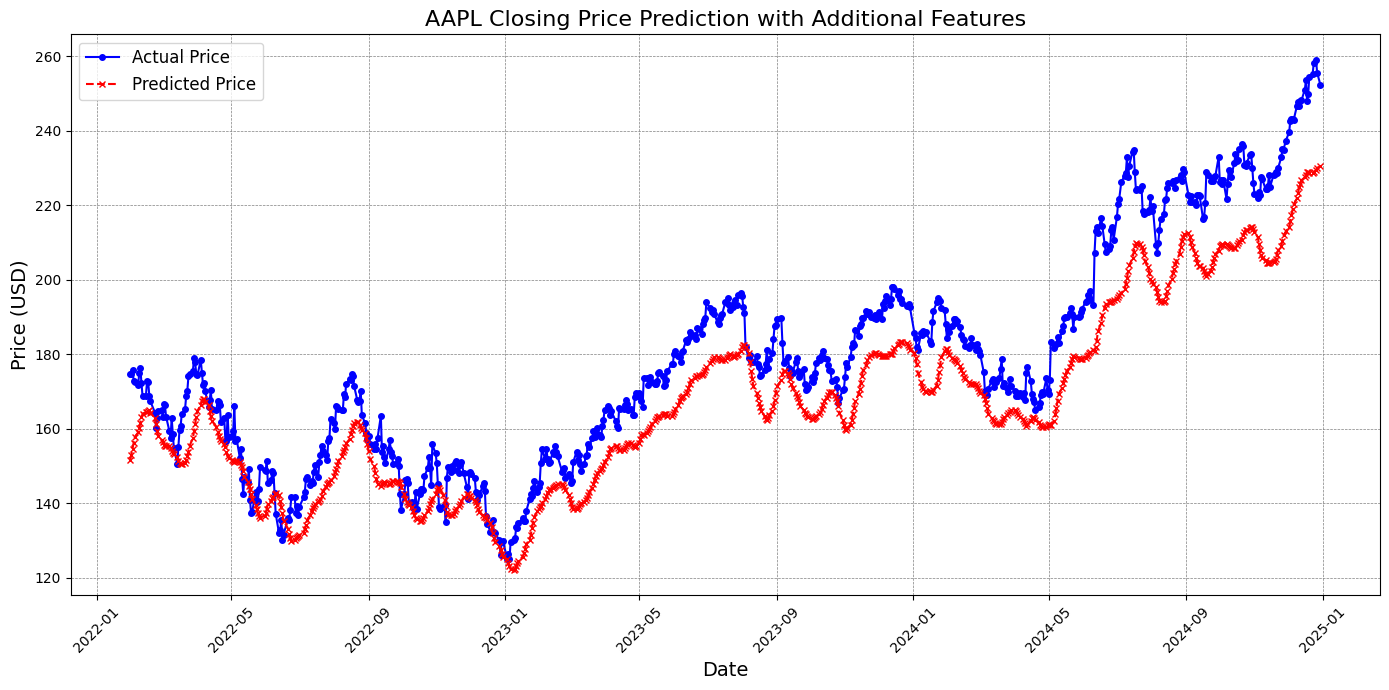

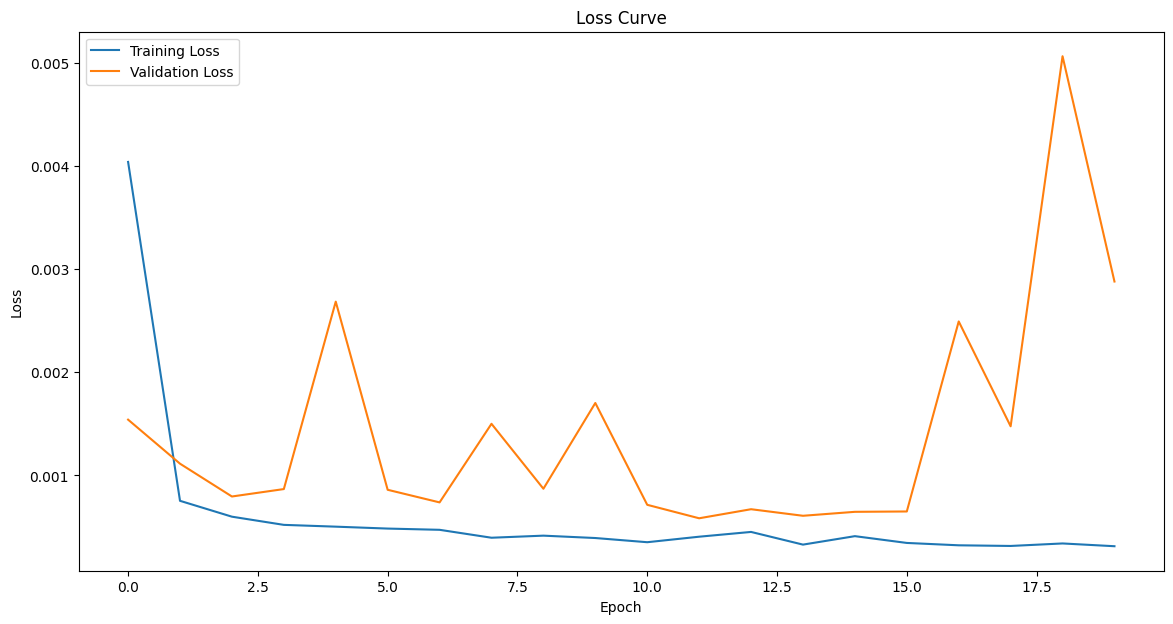

In [ ]:

# Step 3: Preprocess Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close', 'SMA_10', 'SMA_50', 'EMA_10', 'MACD', 'RSI', 'Upper_Band', 'Lower_Band', 'OBV']])

sequence_length = 60  # Use last 60 days to predict the next day
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])  # Include all features
    y.append(scaled_data[i, 0])  # Target is the 'Close' price

X, y = np.array(X), np.array(y)

# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32),
    Dense(16),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 6: Evaluate Model
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(np.hstack((y_pred, np.zeros((len(y_pred), scaled_data.shape[1] - 1)))))[:, 0]
y_test_actual = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((len(y_test), scaled_data.shape[1] - 1)))))[:, 0]

mse = mean_squared_error(y_test_actual, y_pred)
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Ensure test set dates are correctly extracted
test_dates = df['Date'].iloc[-len(y_test_actual):]  # Extract corresponding dates for y_test_actual

# Updated Time Series Chart with Dates on X-Axis
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_actual, label='Actual Price', color='blue' )
plt.plot(test_dates, y_pred, label='Predicted Price', color='red')
plt.title(f"{ticker} Closing Price Prediction with Additional Features", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# Plot Training Loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
